# 城市气候与海洋的关系研究

导入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from pandas import Series,DataFrame
%matplotlib inline

导入数据各个海滨城市数据

In [2]:
ferraral=pd.read_csv('./ferrara_150715.csv')
ferrara2 = pd.read_csv('./ferrara_250715.csv')
ferrara3 = pd.read_csv('./ferrara_270615.csv')
ferrara = pd.concat([ferrara1,ferrara2,ferrara3],ignore_index=True) 
    




FileNotFoundError: File b'./ferrara_150715.csv' does not exist

In [ ]:
torino1 = pd.read_csv('./torino_150715.csv')
torino2 = pd.read_csv('./torino_250715.csv')
torino3 = pd.read_csv('./torino_270615.csv')
torino = pd.concat([torino1,torino2,torino3],ignore_index=True) 


In [ ]:
mantova1 = pd.read_csv('./mantova_150715.csv')
mantova2 = pd.read_csv('./mantova_250715.csv')
mantova3 = pd.read_csv('./mantova_270615.csv')
mantova = pd.concat([mantova1,mantova2,mantova3],ignore_index=True) 

In [ ]:
milano1 = pd.read_csv('./milano_150715.csv')
milano2 = pd.read_csv('./milano_250715.csv')
milano3 = pd.read_csv('./milano_270615.csv')
milano = pd.concat([milano1,milano2,milano3],ignore_index=True) 

In [ ]:
ravenna1 = pd.read_csv('./ravenna_150715.csv')
ravenna2 = pd.read_csv('./ravenna_250715.csv')
ravenna3 = pd.read_csv('./ravenna_270615.csv')
ravenna = pd.concat([ravenna1,ravenna2,ravenna3],ignore_index=True)

In [ ]:
asti1 = pd.read_csv('./asti_150715.csv')
asti2 = pd.read_csv('./asti_250715.csv')
asti3 = pd.read_csv('./asti_270615.csv')
asti = pd.concat([asti1,asti2,asti3],ignore_index=True)

In [ ]:
bologna1 = pd.read_csv('./bologna_150715.csv')
bologna2 = pd.read_csv('./bologna_250715.csv')
bologna3 = pd.read_csv('./bologna_270615.csv')
bologna = pd.concat([bologna1,bologna2,bologna3],ignore_index=True)

In [ ]:
piacenza1 = pd.read_csv('./piacenza_150715.csv')
piacenza2 = pd.read_csv('./piacenza_250715.csv')
piacenza3 = pd.read_csv('./piacenza_270615.csv')
piacenza = pd.concat([piacenza1,piacenza2,piacenza3],ignore_index=True)

In [ ]:
cesena1 = pd.read_csv('./cesena_150715.csv')
cesena2 = pd.read_csv('./cesena_250715.csv')
cesena3 = pd.read_csv('./cesena_270615.csv')
cesena = pd.concat([cesena1,cesena2,cesena3],ignore_index=True)

In [ ]:
faenza1 = pd.read_csv('./faenza_150715.csv')
faenza2 = pd.read_csv('./faenza_250715.csv')
faenza3 = pd.read_csv('./faenza_270615.csv')
faenza = pd.concat([faenza1,faenza2,faenza3],ignore_index=True)

查看行数

In [ ]:
display(faenza1.shape,faenza2.shape,faenza3.shape,faenza.shape)

去除没用的列

In [ ]:
faenza.drop(['Unnamed: 0'],axis = 1,inplace=True)
faenza

各城市与海洋距离，最高温度，最低温度，最高湿度，最低湿度

In [73]:
dist = [ravenna['dist'][0],
     cesena['dist'][0],
     faenza['dist'][0],
     ferrara['dist'][0],
     bologna['dist'][0],
     mantova['dist'][0],
     piacenza['dist'][0],
     milano['dist'][0],
     asti['dist'][0],
     torino['dist'][0]
]
temp_max = [ravenna['temp'].max(),
     cesena['temp'].max(),
     faenza['temp'].max(),
     ferrara['temp'].max(),
     bologna['temp'].max(),
     mantova['temp'].max(),
     piacenza['temp'].max(),
     milano['temp'].max(),
     asti['temp'].max(),
     torino['temp'].max()
]
temp_min = [ravenna['temp'].min(),
     cesena['temp'].min(),
     faenza['temp'].min(),
     ferrara['temp'].min(),
     bologna['temp'].min(),
     mantova['temp'].min(),
     piacenza['temp'].min(),
     milano['temp'].min(),
     asti['temp'].min(),
     torino['temp'].min()
]
hum_min = [ravenna['humidity'].min(),
     cesena['humidity'].min(),
     faenza['humidity'].min(),
     ferrara['humidity'].min(),
     bologna['humidity'].min(),
     mantova['humidity'].min(),
     piacenza['humidity'].min(),
     milano['humidity'].min(),
     asti['humidity'].min(),
     torino['humidity'].min()
]
hum_max = [ravenna['humidity'].max(),
     cesena['humidity'].max(),
     faenza['humidity'].max(),
     ferrara['humidity'].max(),
     bologna['humidity'].max(),
     mantova['humidity'].max(),
     piacenza['humidity'].max(),
     milano['humidity'].max(),
     asti['humidity'].max(),
     torino['humidity'].max()
]
dist

[8, 14, 37, 47, 71, 121, 200, 250, 315, 357]

In [74]:
temp_max

[32.79000000000002,
 32.81,
 32.74000000000001,
 33.43000000000001,
 33.850000000000016,
 34.18000000000001,
 33.920000000000016,
 34.81,
 34.31,
 34.69]

In [75]:
temp_min

[18.220000000000027,
 18.410000000000025,
 18.620000000000005,
 18.81,
 18.44,
 19.03000000000003,
 18.680000000000007,
 18.28000000000003,
 18.010000000000048,
 18.94]

In [76]:
hum_min

[34, 61, 61, 39, 40, 28, 35, 35, 29, 45]

In [77]:
hum_max

[94, 100, 100, 85, 92, 100, 100, 100, 93, 88]

显示最高温度与离海远近的关系

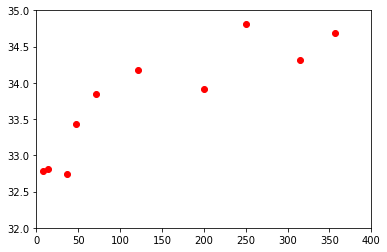

In [65]:
plt.axis([0,400,32,35])
plt.plot(dist,temp_max,'ro')

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [66]:
# 把列表转换为numpy数组
x = np.array(dist)
display('x:',x)
y = np.array(temp_max)
display('y:',y)

# 离海近的一组数据
x1 = x[x<100]
x1 = x1.reshape((x1.size,1))
display('x1:',x1)
y1 = y[x<100]
display('y1:',y1)

# 离海远的一组数据
x2 = x[x>50]
x2 = x2.reshape((x2.size,1))
display('x2:',x2)
y2 = y[x>50]
display('y2:',y2)

'x:'

array([  8,  14,  37,  47,  71, 121, 200, 250, 315, 357], dtype=int64)

'y:'

array([32.79, 32.81, 32.74, 33.43, 33.85, 34.18, 33.92, 34.81, 34.31,
       34.69])

'x1:'

array([[ 8],
       [14],
       [37],
       [47],
       [71]], dtype=int64)

'y1:'

array([32.79, 32.81, 32.74, 33.43, 33.85])

'x2:'

array([[ 71],
       [121],
       [200],
       [250],
       [315],
       [357]], dtype=int64)

'y2:'

array([33.85, 34.18, 33.92, 34.81, 34.31, 34.69])

使用支持向量机计算回归参数

查看最低温度与海洋距离的关系

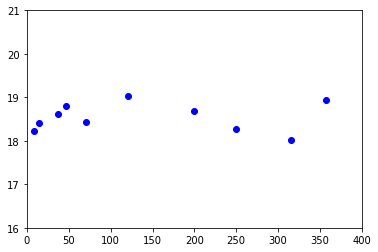

In [67]:
plt.axis((0,400,16,21))
plt.plot(dist,temp_min,'bo')

最低湿度与海洋距离的关系

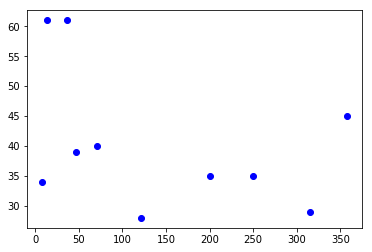

In [68]:
plt.plot(dist,hum_min,'bo')

最高湿度与海洋距离的关系

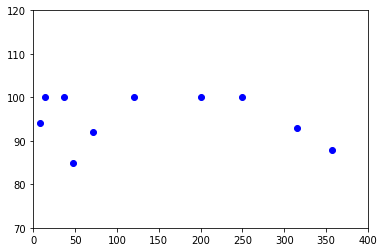

In [69]:
plt.axis([0,400,70,120])
plt.plot(dist,hum_max,'bo')

平均湿度与海洋距离的关系

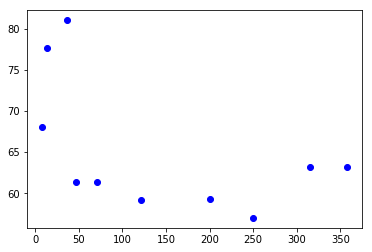

In [70]:
hum_mean = [ravenna['humidity'].mean(),
     cesena['humidity'].mean(),
     faenza['humidity'].mean(),
     ferrara['humidity'].mean(),
     bologna['humidity'].mean(),
     mantova['humidity'].mean(),
     piacenza['humidity'].mean(),
     milano['humidity'].mean(),
     asti['humidity'].mean(),
     torino['humidity'].mean()
]
plt.plot(dist,hum_mean,'bo')

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风向与风速的关系

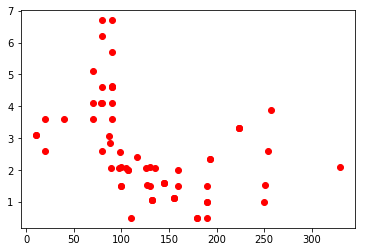

In [71]:
plt.plot(ravenna['wind_deg'],ravenna['wind_speed'],'ro')

在子图中，同时比较风向与湿度和风力的关系

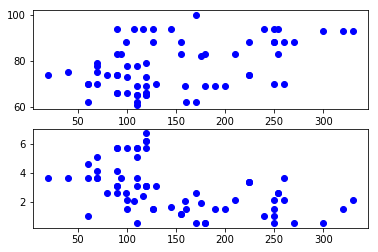

In [72]:
plt.subplot(211)
plt.plot(cesena['wind_deg'],cesena['humidity'],'bo')
plt.subplot(212)
plt.plot(cesena['wind_deg'],cesena['wind_speed'],'bo')

可以看到散点图显示效果不好

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

In [25]:
def showRoseWind(values,city_name):
    max_value=values.max()
    N=8
    theta=np.arange(0,2*np.pi,2*np.pi/N)
    radii=np.array(values)
    plt.axes([0.025,0.025,0.95,0.95],polar=True)
    colors=[(1-x/max_value,1-x/max_value,0.75) for x in radii]
    plt.bar(theta,radii,width=(2*np.pi/N),bottom=0.0,color=colors)
    plt.title(city_name,x=0.2,fontsize=20)

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

[ 5 12 24  9 11  4  0  1]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


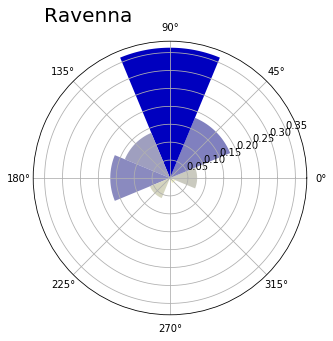

In [26]:
hist,bin=np.histogram(ravenna['wind_deg'],8,[0,360])
print(hist)
hist=hist/hist.sum()
print(bin)
showRoseWind(hist,'Ravenna')

[0.29411765 0.11764706 0.11764706 0.13235294 0.10294118 0.07352941
 0.08823529 0.07352941]


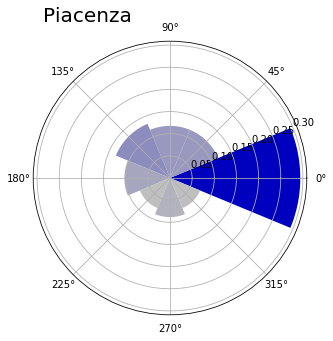

In [29]:
hist,bin=np.histogram(piacenza['wind_deg'],8,[0,360])
hist=hist/hist.sum()
print(hist)
showRoseWind(hist,'Piacenza')

计算米兰各个方向上的风速

In [30]:
print(milano[milano['wind_deg']<45]['wind_speed'].mean())

1.8142857142857147


In [32]:
degs=np.arange(45,361,45)
print(degs)

[ 45  90 135 180 225 270 315 360]


将各个方向的风速保存在列表中

In [34]:
tmp=[]
for deg in degs:
    tmp.append(milano[(milano['wind_deg']>(deg-46))&(milano['wind_deg']<deg)]['wind_speed'].mean())
    
speeds=np.array(tmp)
print(speeds)

[1.81428571 2.22222222 2.85555556 2.58333333 2.32857143 2.26666667
 2.05       2.1       ]


画出各个方向的风速

Text(0.2,1.05,'Milano')

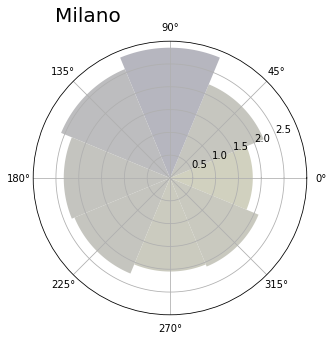

In [44]:
N=8
theta = np.arange(0.,2*np.pi,2* np.pi / N)
radii = np.array(speeds)
plt.axes([0.025,0.025,0.95,0.95],polar=True)
colors=[(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
bars = plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
plt.title('Milano',x=0.2,fontsize=20)


将上面步骤写成函数

In [48]:
def RoseWind_Speed(city):
   degs = np.arange(45,361,45)
   tmp =  []
   for deg in degs:
      tmp.append(city[(city['wind_deg']>(deg-46)) & (city['wind_deg']<deg)]['wind_speed'].mean())
   return np.array(tmp)

In [50]:
def showRoseWind_Speed(speeds,city_name):
   N = 8
   theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
   radii = np.array(speeds)
   plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
   colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
   bars = plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)

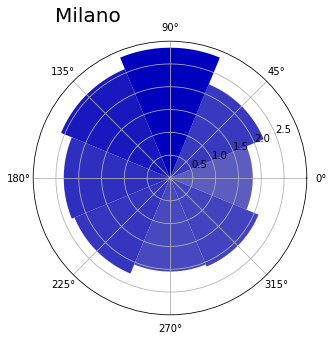

In [51]:
showRoseWind(RoseWind_Speed(milano),'Milano')

2、小麦种类预测¶
读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
samples = pd.read_table('./seeds.tsv',header=None)
samples

samples.shape

(210, 8)

In [25]:
samples.iloc[:,0:7]
data = samples.iloc[:,:-1]  
target = samples[7]  
target

0          Kama
1          Kama
2          Kama
3          Kama
4          Kama
5          Kama
6          Kama
7          Kama
8          Kama
9          Kama
10         Kama
11         Kama
12         Kama
13         Kama
14         Kama
15         Kama
16         Kama
17         Kama
18         Kama
19         Kama
20         Kama
21         Kama
22         Kama
23         Kama
24         Kama
25         Kama
26         Kama
27         Kama
28         Kama
29         Kama
         ...   
180    Canadian
181    Canadian
182    Canadian
183    Canadian
184    Canadian
185    Canadian
186    Canadian
187    Canadian
188    Canadian
189    Canadian
190    Canadian
191    Canadian
192    Canadian
193    Canadian
194    Canadian
195    Canadian
196    Canadian
197    Canadian
198    Canadian
199    Canadian
200    Canadian
201    Canadian
202    Canadian
203    Canadian
204    Canadian
205    Canadian
206    Canadian
207    Canadian
208    Canadian
209    Canadian
Name: 7, Length: 210, dt

In [26]:
X_train = data[:190]
y_train = target[:190]
# 测试数据
X_test = data[190:]
y_test = target[190:]

In [27]:
knn = KNeighborsClassifier(n_neighbors=13)  #测试得到n_neighbors = 13的测试准确率较大
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [31]:
y_ = knn.predict(X_test)
y_

array(['Canadian', 'Canadian', 'Canadian', 'Canadian', 'Canadian',
       'Canadian', 'Canadian', 'Canadian', 'Kama', 'Kama', 'Canadian',
       'Kama', 'Canadian', 'Canadian', 'Canadian', 'Canadian', 'Canadian',
       'Canadian', 'Canadian', 'Canadian'], dtype=object)

In [29]:
knn.score(X_test,y_test)

0.9

0.9

3、改进约会网站的匹配效果
读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度